INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA \
CAMPUS FLORIANÓPOLIS \
DEPARTAMENTO ACADÊMICO DE ELETRÔNICA \
ENGENHARIA ELETRÔNICA

Estudante: Enzzo Comassetto dos Santos


# Atividade: Filtros em Imagens

In [187]:
from skimage import io
from skimage.filters import unsharp_mask, sobel
from skimage.filters.rank import median
from skimage.morphology import disk
import numpy as np
import scipy as scp
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from imshowpair import imshowpair

## Trabalhando com imagens pré-gravadas no computador

### Filtros passa-baixas

1. Vimos que para filtrar uma imagem, é necessário definir um *kernel*, que nada mais é que a resposta ao impulso do filtro. Considere a imagem [1]. Defina filtros passa-baixas (a) 3x3 e (b) 9x9. Você pode gerar manualmente a matriz (como no exemplo _Blur_ de [2]) ou usar um dos elementos estruturantes (*square*, *disk*, etc.) do módulo *morphology* do Skimage [3]. Filtre a imagem. A imagem é melhorada com esses filtros? Mostre os resultados.

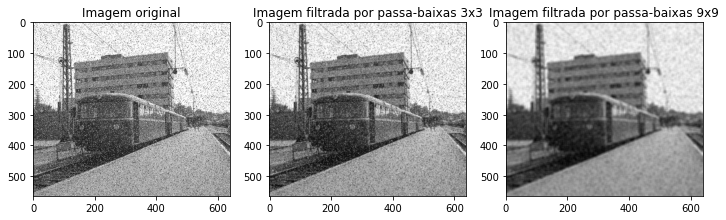

In [188]:
train = io.imread('hw3_train.jpg')
fp3 = np.ones((3,3))
fp3 = ((1/len(fp3))**2) * fp3

fp9 = np.ones((9,9));
fp9 = ((1/len(fp9))**2) * fp9

train3 = convolve(train, fp3)
train9 = convolve(train, fp9)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 12))
ax1.imshow(train, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(train3, cmap=plt.cm.gray)
ax2.set_title('Imagem filtrada por passa-baixas 3x3')

ax3.imshow(train9, cmap=plt.cm.gray)
ax3.set_title('Imagem filtrada por passa-baixas 9x9')

plt.show();

2. Filtre a mesma imagem [1] com filtro de mediana [4]. A imagem é melhorada? Qual a influência do tamanho do filtro e do formato do elemento estruturante? O filtro de mediana é linear? Mostre os resultados.

### O filtro de mediana é altamente eficaz para ruidos granulados. Desta forma para a imagem analisada ele apresenta resultados melhores do que os filtros passa-baixas. Estruturas de filtro com o raio muito grande borram a imagem, porem para raios menores ele preserva as bordas dos objetos presentes na imagem.

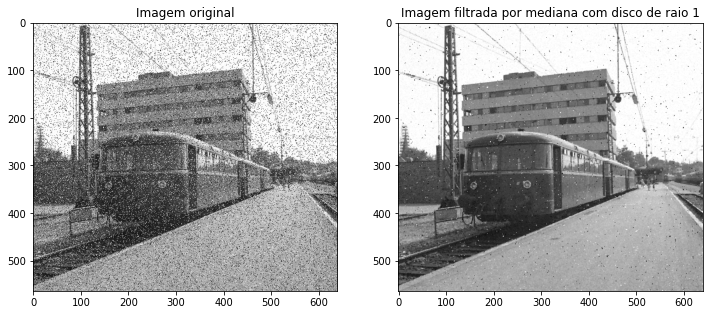

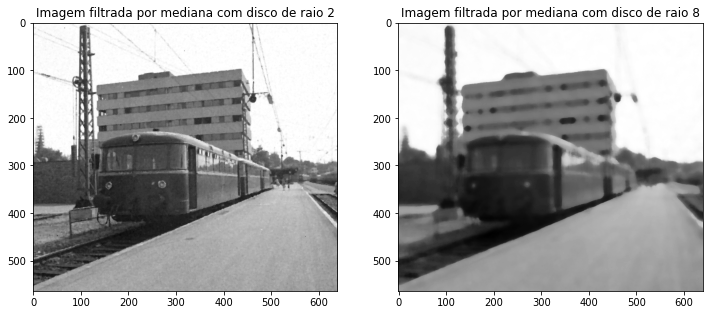

In [189]:
train_filt1 = median(train, disk(1))
train_filt2 = median(train, disk(2))
train_filt8 = median(train, disk(8))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(train, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(train_filt1, cmap=plt.cm.gray)
ax2.set_title('Imagem filtrada por mediana com disco de raio 1')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
ax3.imshow(train_filt2, cmap=plt.cm.gray)
ax3.set_title('Imagem filtrada por mediana com disco de raio 2')

ax4.imshow(train_filt8, cmap=plt.cm.gray)
ax4.set_title('Imagem filtrada por mediana com disco de raio 8')

plt.show();

### Filtros passa-altas

4. Considere a imagem [5]. Procure melhorá-la (aguçar os contornos) usando um filtro linear. Você pode usar um filtro passa-altas (como no exemplo _Sharpening_ de [2]) ou a máscara *unsharp_mask* de `skimage.filters` [6]. Apresente os resultados.

Text(0.5, 1.0, 'Imagem filtrada por mediana com disco de raio 1')

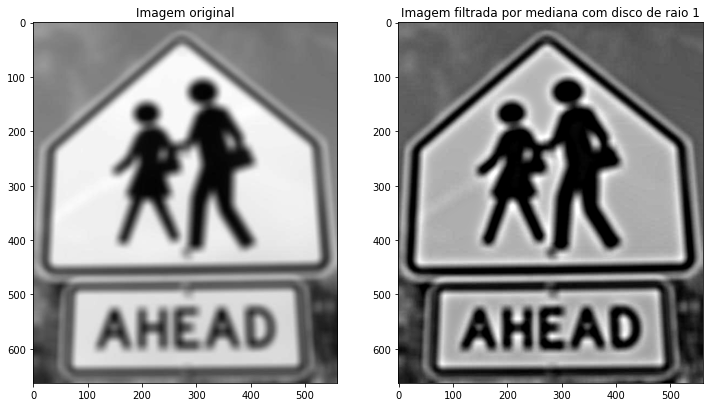

In [190]:
road_sign = io.imread('hw3_road_sign_school_blurry.jpg')
road_sign_sharpened =  unsharp_mask(road_sign, radius=10, amount=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(road_sign, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(road_sign_sharpened, cmap=plt.cm.gray)
ax2.set_title('Imagem filtrada por mediana com disco de raio 1')

## Usando imagens capturadas com ESP32-CAM
Da mesma forma que nas atividades anteriores, iremos capturar imagens com a ESP32-CAM e processá-las em um cliente http usando OpenCV no Python.

Então, a primeira parte é ter o servidor funcionando. Usaremos exatamente a mesma configuração da primeira atividade com a placa ESP32-CAM, disponível em https://github.com/fspacheco/esp32-cam/tree/main/ESP32-AP-CameraWebServer. Você pode observar no código em `app_httpd.cpp`, na função `startCameraServer()`, que existe um *uniform resource identifier* (URI) para **captura** de uma imagem, bastando apontar para http://192.168.4.1/capture e obtendo como retorno uma imagem no formato jpg.

In [191]:
# adaptado de https://how2electronics.com/color-detection-tracking-with-esp32-cam-opencv/
import cv2
import urllib.request
import numpy as np
 
url='http://192.168.4.1/capture'
 
while True:
    img_resp=urllib.request.urlopen(url)
    imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    frame=cv2.imdecode(imgnp,-1)
    
    cv2.imshow("Imagem capturada", frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow("Imagem em tons de cinza", gray)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: # 27 - tecla ESC para sair
        break

# para gravar a última imagem, é só usar imwrite
cv2.imwrite('imagem-capturada3.jpg', frame)
cv2.destroyAllWindows()
print('Núm. de planos da imagem: ', frame.ndim)
print('Dimensões da imagem: ', frame.shape)
print('Dimensões da imagem em tons de cinza: ', gray.shape)

Núm. de planos da imagem:  3
Dimensões da imagem:  (480, 640, 3)
Dimensões da imagem em tons de cinza:  (480, 640)


5. Agora, a partir da imagem `gray`, use as funções `cv.filter2D` e `cv.mediamBlur` [7] para melhorar a imagem capturada. Apresente o código, imagens resultantes e comente.

Inclua, aqui, um quadro capturado e o resultado. Para isso, você deve gravar as imagens com `imwrite` e incorporar o link com o código mostrado abaixo. Ao enviar seu relatório, inclua as imagens no pacote zip.

Text(0.5, 1.0, 'cv.filter2D')

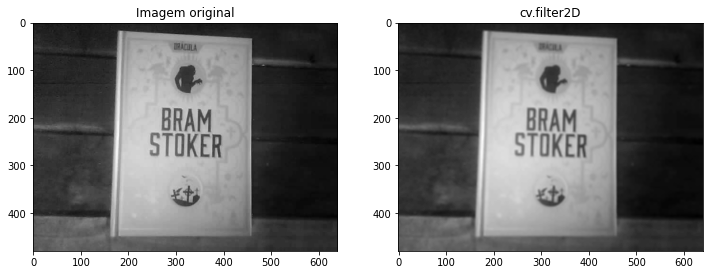

In [192]:
img = cv2.imread('imagem-capturada3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('imagem-gray3.jpg', gray)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(gray,-1,kernel)
cv2.imwrite('imagem-filter2d3.jpg', dst)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(dst, cmap=plt.cm.gray)
ax2.set_title('cv.filter2D')



Text(0.5, 1.0, 'cv2.medianBlur')

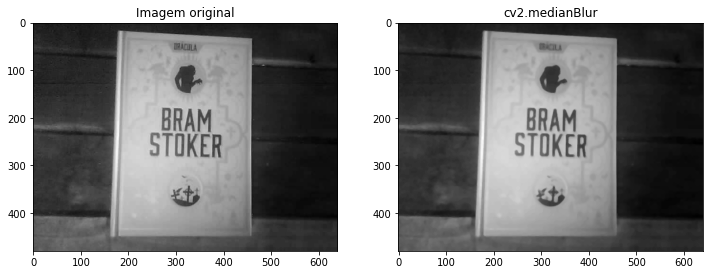

In [193]:
median = cv2.medianBlur(gray,5)
cv2.imwrite('imagem-medianblur3.jpg', median)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(median, cmap=plt.cm.gray)
ax2.set_title('cv2.medianBlur')

Text(0.5, 1.0, 'cv.filter2D + cv2.medianBlur')

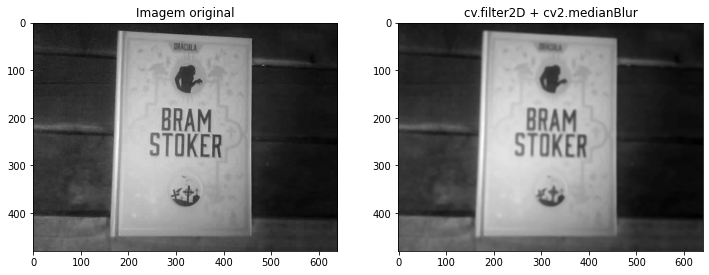

In [194]:
#Aplicando os dois filtros
filtros_2 = cv2.medianBlur(dst,5)
cv2.imwrite('imagem-medianblur_filter2D3.jpg', filtros_2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(gray, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(filtros_2, cmap=plt.cm.gray)
ax2.set_title('cv.filter2D + cv2.medianBlur')

### As funções em alguns testes parecem deixar alguns detalhes mais nitidos, porem diminuem a diferença entre as bordas

## Detecção de bordas (Opcional)

5. Usando um kernel do tipo Sobel ou Canny, identifique as bordas da folha na imagem [8]. Mostre o resultado. Depois, aplique os mesmos parâmetros para a imagem [9]. As bordas são detectadas corretamente? É necessário ajustar os parâmetros?

Text(0.5, 1.0, 'Detecção de borda da imagem')

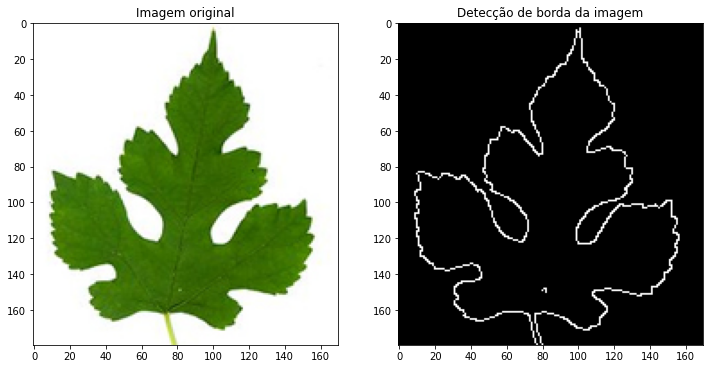

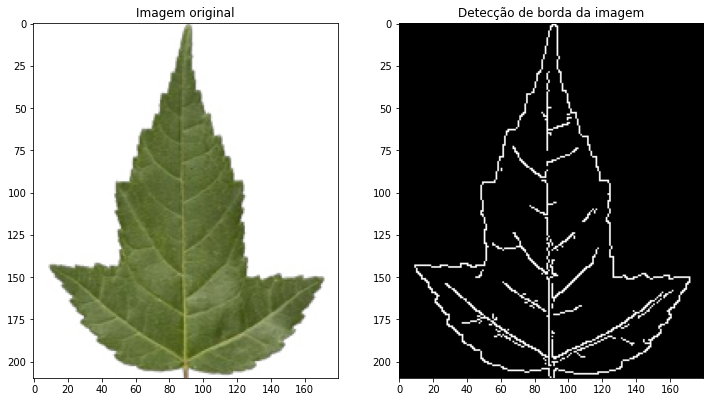

In [195]:
t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 3  # Aperture size

leaf_1 = io.imread('hw3_leaf_training_1.jpg')
leaf_1_sobel = cv2.Canny(leaf_1, t_lower, t_upper, 
                 apertureSize=aperture_size)
leaf_4 = io.imread('hw3_leaf_training_4.jpg')
leaf_4_sobel = cv2.Canny(leaf_4, t_lower, t_upper, 
                 apertureSize=aperture_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(leaf_1, cmap=plt.cm.gray)
ax1.set_title('Imagem original')

ax2.imshow(leaf_1_sobel, cmap=plt.cm.gray)
ax2.set_title('Detecção de borda da imagem')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
ax3.imshow(leaf_4, cmap=plt.cm.gray)
ax3.set_title('Imagem original')

ax4.imshow(leaf_4_sobel, cmap=plt.cm.gray)
ax4.set_title('Detecção de borda da imagem')

## Referências

[1] hw3_train.jpg foi obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível; arquivo está em anexo)

[2] https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

[3] https://scikit-image.org/docs/dev/api/skimage.morphology.html

[4] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#noise-removal

[5] hw3_road_sign_school_blurry.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

[6] https://scikit-image.org/docs/dev/auto_examples/filters/plot_unsharp_mask.html

[7] https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

[8] hw3_leaf_training_1.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

[9] hw3_leaf_training_4.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

## Bibliografia

https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing


https://www.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/help/images/ref/imfindcircles.html#examples

https://www.mathworks.com/examples/image/community/18507-missing-planes